<a href="https://colab.research.google.com/github/kjeyaram-orcl/DataScience/blob/main/MachineLearningBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

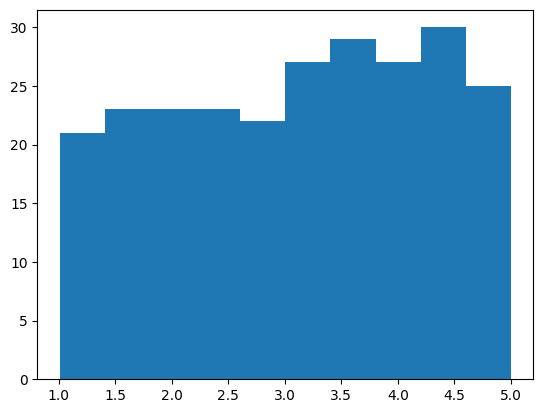

In [ ]:
#uniform distribution

import numpy as np
import matplotlib.pyplot as plt

x=np.random.uniform(1.0,5.0,250)
#print(x)

plt.hist(x,10)
plt.show()


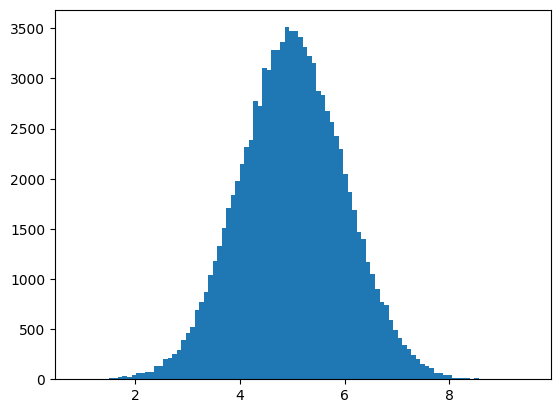

In [ ]:
# Normal Distribution

import numpy as np
import matplotlib.pyplot as plt

x=np.random.normal(5.0,1.0,100000) #mean value is 5.0, and the standard deviation is 1.0.
plt.hist(x,100)
plt.show()

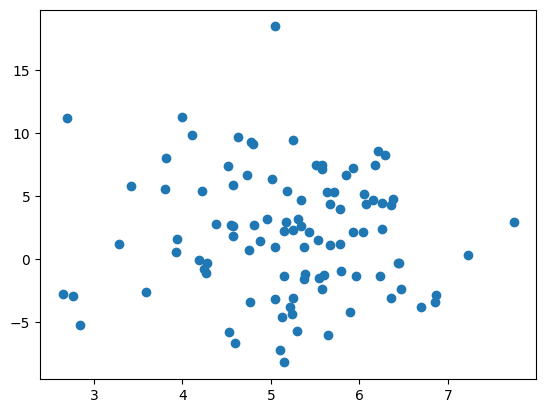

In [ ]:
# Scatter plot

import numpy as np
import matplotlib.pyplot as plt

x=np.random.normal(5.0,1.0,100)
y=np.random.normal(2.0,5.0,100)

plt.scatter(x,y)
plt.show()


#Linear Regession



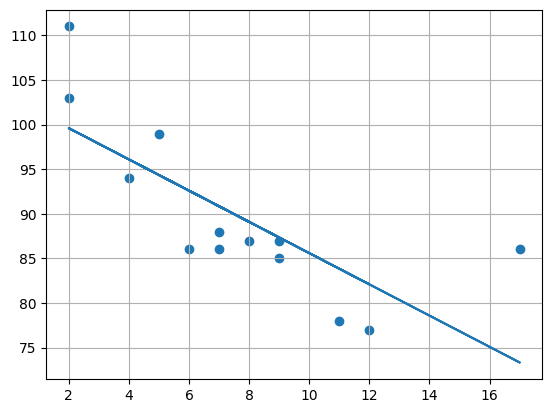

The result -0.75859 shows that there is a relationship, not perfect
he speed of a 10 years old car is  85.59308314937454


In [ ]:
# Good Fit
import matplotlib.pyplot as plt
from scipy import stats

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.grid()
plt.show()

#The r value ranges from -1 to 1, where 0 means no relationship, and 1 (and -1) means 100% related.
print ( "The result", round(r,5), "shows that there is a relationship, not perfect")

#Predict Future Values. Example: Let us try to predict the speed of a 10 years old car.
print( 'The speed of a 10 years old car is ' , myfunc(10))


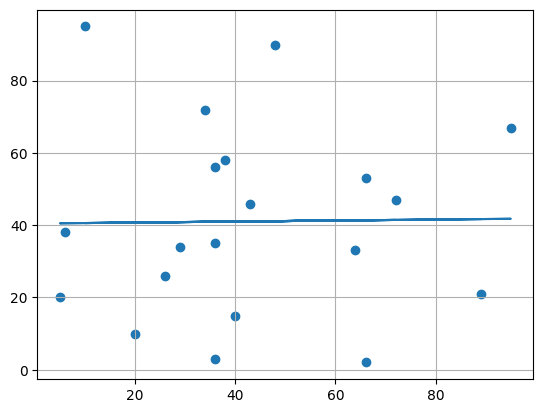

The result 0.01332 indicates a very bad relationship, and tells us that this data set is not suitable for linear regression.


In [ ]:
# Bad Fit

import matplotlib.pyplot as plt
from scipy import stats

x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.grid()
plt.show()

#The r value ranges from -1 to 1, where 0 means no relationship, and 1 (and -1) means 100% related.
print ( "The result", round(r,5), "indicates a very bad relationship, and tells us that this data set is not suitable for linear regression.")


#Multiple Regression

In [ ]:
#predict a value based on two or more variables.

from sklearn import linear_model
import pandas as pa

df = pa.read_csv('/content/car_data.csv')
X = df[['Weight', 'Volume']]
Y = df[['CO2']]

regr = linear_model.LinearRegression()
regr.fit(X, Y)

print(regr.coef_)
#predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300cm3:
predictedCO2 = regr.predict([[2300, 1300]])
print('We have predicted that a car with 1.3 liter engine, and a weight of 2300 kg, will release approximately', predictedCO2, 'grams of CO2 for every kilometer it drives.')



[[0.00755095 0.00780526]]
We have predicted that a car with 1.3 liter engine, and a weight of 2300 kg, will release approximately [[107.2087328]] grams of CO2 for every kilometer it drives.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#Polynomial Regression

         3         2
-0.1089 x + 2.256 x - 11.84 x + 33.63


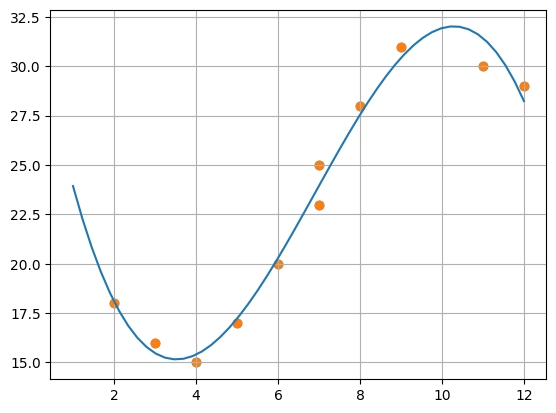

This means that  {'r_squared': 98.41} of the variation in the response variable can be explained by the predictor variables.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

x = [2, 3, 4, 5, 6, 7, 7, 8, 9, 11, 12]
y = [18, 16, 15, 17, 20, 23, 25, 28, 31, 30, 29]

#create scatterplot
plt.scatter(x, y)

#polynomial fit with degree = 3
model = np.poly1d(np.polyfit(x, y, 3))

#The fitted polynomial regression equation is
print(model) # y = -0.109x3 + 2.256x2 – 11.839x + 33.626

#For example,suppose x = 4. The expected value for the response variable, y, would be: y = -0.109(4)3 + 2.256(4)2 – 11.839(4) + 33.626= 15.39.

#add fitted polynomial line to scatterplot
polyline = np.linspace(1, 12, 50)
plt.scatter(x, y)
plt.plot(polyline, model(polyline))
plt.grid()
plt.show()


#define function to calculate r-squared
def polyfit(x, y, degree):
    results = {}
    coeffs = numpy.polyfit(x, y, degree)
    p = numpy.poly1d(coeffs)
    #calculate r-squared
    yhat = p(x)
    ybar = numpy.sum(y)/len(y)
    ssreg = numpy.sum((yhat-ybar)**2)
    sstot = numpy.sum((y - ybar)**2)
    results['r_squared'] = round ((ssreg / sstot)  *100,2)
    return results

#find r-squared of polynomial model with degree = 3
r2 = polyfit(x, y, 3)

print('This means that ', r2 ,'of the variation in the response variable can be explained by the predictor variables.')




          3         2
-0.03032 x + 1.343 x - 15.54 x + 113.8


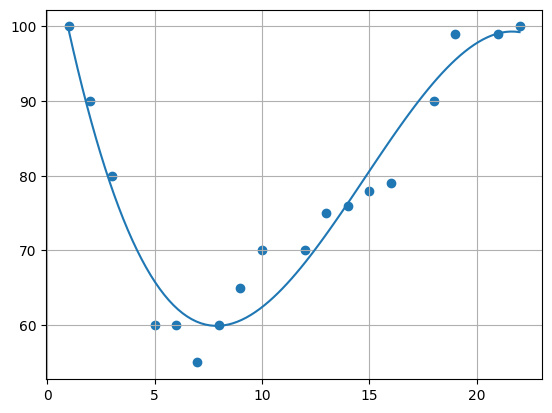

The result 0.94 shows that there is a very good relationship, and we can use polynomial regression in future predictions.
89 2


In [ ]:
import numpy
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

curve=numpy.polyfit(x, y, 3)
mymodel = numpy.poly1d(curve)
print(mymodel)

myline = numpy.linspace(1, 22, 100)
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.grid()
plt.show()


#How well does my data fit in a polynomial regression?
r2_score(y, mymodel(x))
print('The result', round(r2_score(y, mymodel(x)),2) ,'shows that there is a very good relationship, and we can use polynomial regression in future predictions.')

#Predict the speed of a car passing at 17:00:
speed = mymodel(17)
print(round(speed),2)



#Scaling

In [26]:
#predict a value based on two or more variables.

import pandas as pa
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

df = pa.read_csv('/content/car_data.csv')

df['Volume']=df['Volume']/1000

X = df[['Weight', 'Volume']]
y = df['CO2']

scaledX = scale.fit_transform(X) # The standardization method uses this formula: z = (x - u) / s

regr = linear_model.LinearRegression()
regr.fit(scaledX, y)

scaled = scale.transform([[2300, 1.3]])
print(scaled)

predictedCO2 = regr.predict([scaled[0]])
print(predictedCO2)


[[ 4.22104928 -0.81116837]]
[107.2087328]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#Machine Learning - Train/Test

        4         3         2
0.5165 x - 11.62 x + 80.42 x - 241.7 x + 333.9


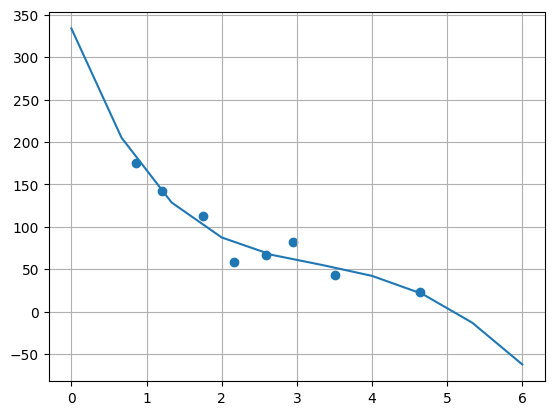

In [48]:
#Train/Test is a method to measure the accuracy of your model.
#you split the data set into two sets: a training set (80%) and a testing set(20%).
#You train the model using the training set. - Train the model means create the model.
#You test the model using the testing set. - Test the model means test the accuracy of the model.


import numpy as np
import matplotlib.pyplot as plt
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 10)
y = numpy.random.normal(150, 40, 10) / x

train_x=x[:8]
train_y=y[:8]

test_x=x[8:]
test_y=y[8:]

plt.scatter(train_x, train_y)
plt.grid()

fit=np.polyfit(train_x, train_y,4)
cur=np.poly1d(fit)
print(cur)
line = numpy.linspace(0,6,10)
plt.plot(line,cur(line))
plt.show()


